In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import datetime

Initial Glance at Data

- Want to look at the data at a broader scale and understand if there is a general trend that exists within MSFT stock price.
- Does the MSFT stock price suggest an overall trend up?
- Based on recent data is there anything that suggests that consumers should buy MSFT?

In [4]:
msft = yf.Ticker("MSFT")

In [5]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [34]:
data = msft.history()
data = data.reset_index()

In [41]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-10-02 00:00:00-04:00,422.579987,422.820007,416.709991,417.130005,16582300,0.0,0.0
1,2024-10-03 00:00:00-04:00,417.630005,419.549988,414.290009,416.540009,13686400,0.0,0.0
2,2024-10-04 00:00:00-04:00,418.239990,419.750000,414.970001,416.059998,19169700,0.0,0.0
3,2024-10-07 00:00:00-04:00,416.000000,417.109985,409.000000,409.540009,20919800,0.0,0.0
4,2024-10-08 00:00:00-04:00,410.899994,415.660004,408.170013,414.709991,19229300,0.0,0.0
5,2024-10-09 00:00:00-04:00,415.859985,420.380005,414.299988,417.459991,14974300,0.0,0.0
6,2024-10-10 00:00:00-04:00,415.230011,417.350006,413.149994,415.839996,13848400,0.0,0.0
7,2024-10-11 00:00:00-04:00,416.140015,417.130005,413.250000,416.320007,14144900,0.0,0.0
8,2024-10-14 00:00:00-04:00,417.769989,424.040009,417.519989,419.140015,16653100,0.0,0.0
9,2024-10-15 00:00:00-04:00,422.179993,422.480011,415.260010,418.739990,18900200,0.0,0.0


In [49]:
x = data.index
y = data["Open"]

In [51]:
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

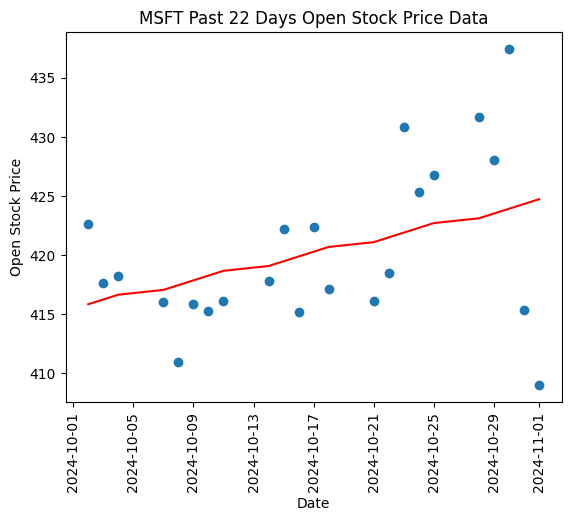

In [55]:
plt.scatter(x=data["Date"], y=data["Open"])
plt.xlabel("Date")
plt.ylabel("Open Stock Price")
plt.xticks(rotation=90)
plt.plot(data["Date"], line, color='red')
plt.title("MSFT Past 22 Days Open Stock Price Data")
plt.show()

Based on data above, it seems as if the trend looks upward and the open stock price goes upwards based on the data per day

More Data Analysis:

- What are the trends with moving averages?
- Do the moving averages suggest anything that can be considered that we should look at?

In [105]:
data2 = msft.history(period='5y')
data2.reset_index()
df_20 = pd.DataFrame(data2)
df_20["20 Day Moving Average"] = df_20["Close"].rolling(window=20).mean()
df_20 = df_20[20:]
df_20.reset_index(inplace=True)
df_20

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,20 Day Moving Average
0,2019-12-03 00:00:00-05:00,141.354444,143.213728,140.549376,143.098724,24066000,0.0,0.0,142.179266
1,2019-12-04 00:00:00-05:00,143.894202,143.932531,142.993303,143.616272,17574700,0.0,0.0,142.461031
2,2019-12-05 00:00:00-05:00,143.807935,144.066707,143.261640,143.692917,17869100,0.0,0.0,142.765733
3,2019-12-06 00:00:00-05:00,144.708862,145.552244,144.018812,145.437241,16403500,0.0,0.0,143.148100
4,2019-12-09 00:00:00-05:00,144.785501,145.878077,144.632154,145.063431,16687400,0.0,0.0,143.430587
...,...,...,...,...,...,...,...,...,...
1233,2024-10-28 00:00:00-04:00,431.660004,431.940002,426.299988,426.589996,14882400,0.0,0.0,419.176501
1234,2024-10-29 00:00:00-04:00,428.000000,433.170013,425.799988,431.950012,17644100,0.0,0.0,419.739502
1235,2024-10-30 00:00:00-04:00,437.440002,438.500000,432.100006,432.529999,29749100,0.0,0.0,420.509502
1236,2024-10-31 00:00:00-04:00,415.359985,416.160004,406.299988,406.350006,53971000,0.0,0.0,420.000002


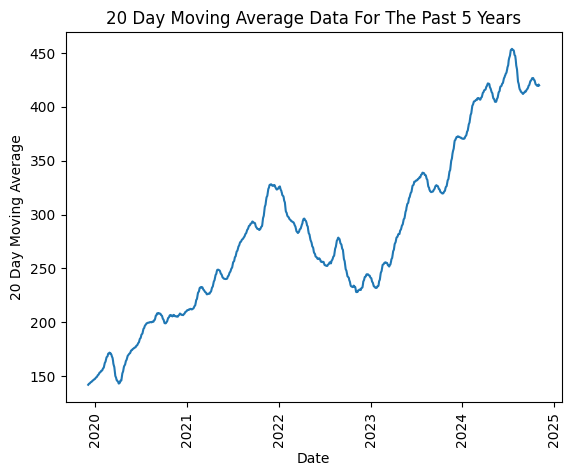

In [106]:
plt.plot(df_20["Date"], df_20["20 Day Moving Average"])
plt.xlabel("Date")
plt.ylabel("20 Day Moving Average")
plt.xticks(rotation=90)
plt.title("20 Day Moving Average Data For The Past 5 Years")
plt.show()

In [117]:
data2 = msft.history(period='5y')
data2.reset_index()
df_50 = pd.DataFrame(data2)
df_50["50 Day Moving Average"] = df_50["Close"].rolling(window=50).mean()
df_50 = df_50[50:]
df_50.reset_index(inplace=True)
df_50

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,50 Day Moving Average
0,2020-01-16 00:00:00-05:00,157.513059,159.324435,157.206364,159.257339,23865400,0.0,0.0,147.211262
1,2020-01-17 00:00:00-05:00,160.455332,160.503254,158.548110,160.148651,34371700,0.0,0.0,147.654615
2,2020-01-21 00:00:00-05:00,159.746083,161.193276,159.506483,159.573578,29517200,0.0,0.0,148.094109
3,2020-01-22 00:00:00-05:00,160.436208,160.522475,158.787758,158.806931,24138800,0.0,0.0,148.514449
4,2020-01-23 00:00:00-05:00,159.276503,159.861128,158.394777,159.784454,19680800,0.0,0.0,148.921864
...,...,...,...,...,...,...,...,...,...
1203,2024-10-28 00:00:00-04:00,431.660004,431.940002,426.299988,426.589996,14882400,0.0,0.0,420.783801
1204,2024-10-29 00:00:00-04:00,428.000000,433.170013,425.799988,431.950012,17644100,0.0,0.0,420.992201
1205,2024-10-30 00:00:00-04:00,437.440002,438.500000,432.100006,432.529999,29749100,0.0,0.0,421.146801
1206,2024-10-31 00:00:00-04:00,415.359985,416.160004,406.299988,406.350006,53971000,0.0,0.0,420.791001


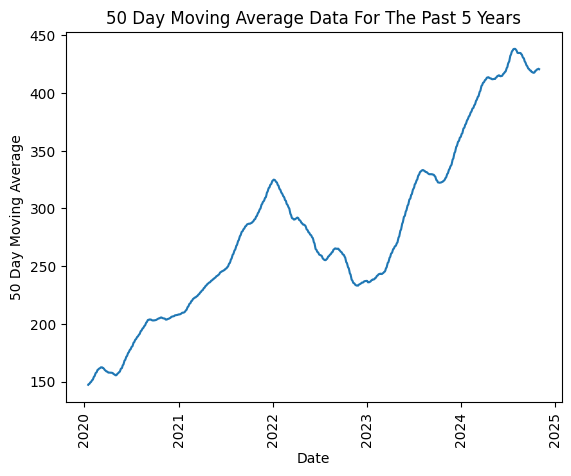

In [118]:
plt.plot(df_50["Date"], df_50["50 Day Moving Average"])
plt.xlabel("Date")
plt.ylabel("50 Day Moving Average")
plt.xticks(rotation=90)
plt.title("50 Day Moving Average Data For The Past 5 Years")
plt.show()

In [115]:
data2 = msft.history(period='5y')
data2.reset_index()
df_100 = pd.DataFrame(data2)
df_100["100 Day Moving Average"] = df_100["Close"].rolling(window=100).mean()
df_100 = df_100[100:]
df_100.reset_index(inplace=True)
df_100

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,100 Day Moving Average
0,2020-03-30 00:00:00-04:00,146.497550,154.339458,144.162269,153.983871,63420300,0.0,0.0,152.927647
1,2020-03-31 00:00:00-04:00,153.186242,158.356522,150.456954,151.562134,77927200,0.0,0.0,153.063460
2,2020-04-01 00:00:00-04:00,147.035694,151.600528,144.940683,146.180389,57969900,0.0,0.0,153.149275
3,2020-04-02 00:00:00-04:00,145.940157,149.419036,144.498630,149.207611,49630700,0.0,0.0,153.263452
4,2020-04-03 00:00:00-04:00,149.053871,151.244990,146.257305,147.833374,41243300,0.0,0.0,153.347649
...,...,...,...,...,...,...,...,...,...
1153,2024-10-28 00:00:00-04:00,431.660004,431.940002,426.299988,426.589996,14882400,0.0,0.0,427.785598
1154,2024-10-29 00:00:00-04:00,428.000000,433.170013,425.799988,431.950012,17644100,0.0,0.0,427.867536
1155,2024-10-30 00:00:00-04:00,437.440002,438.500000,432.100006,432.529999,29749100,0.0,0.0,427.961961
1156,2024-10-31 00:00:00-04:00,415.359985,416.160004,406.299988,406.350006,53971000,0.0,0.0,427.754460


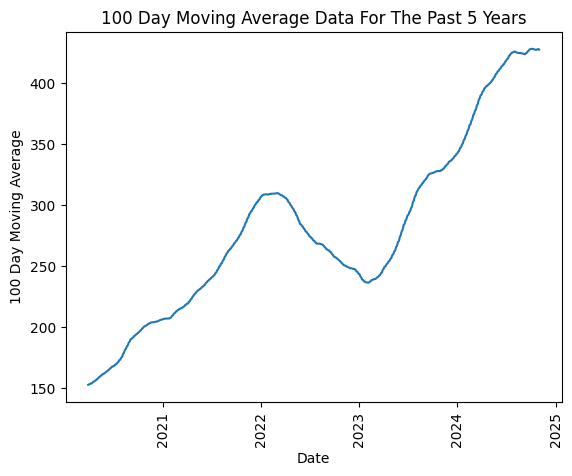

In [116]:
plt.plot(df_100["Date"], df_100["100 Day Moving Average"])
plt.xlabel("Date")
plt.ylabel("100 Day Moving Average")
plt.xticks(rotation=90)
plt.title("100 Day Moving Average Data For The Past 5 Years")
plt.show()

Based on the three graphs that have been created above it seems as if the 20 day, 50 day, and 100 day moving averages seem to be around the same

Although they are roughly the same, we can see that the 20 day moving average provides us with the best data and explanation because it allows us to see what exactly is going around the data more specifically. This is expected intuitively because the more specific we go within analyzing the data the better the graph will look because it takes into account less days and can create a more important moving average for the data.